In [3]:
#importing required libraries
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [18]:
#importing dataset
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [19]:
#counting the number of data with neutral label
dataset[dataset.Classificacao == 'Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [20]:
#counting the number of positive labeled data
dataset[dataset.Classificacao == 'Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [21]:
#counting the number of negative labeled data
dataset[dataset.Classificacao == 'Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [22]:
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#extracting tweet column
tweets = dataset["Text"].values
tweets

array([ '���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ',
       '� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf',
       '�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw',
       ...,
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/zaQbXRRJWc',
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia: Um dos autores teria molestado vítima de… https://t.co/lQ8cTSNftA',
       'Trio suspeito de roubo de cargas é preso em Santa Luzia (MG) https://t.co/0INgJcMtZb #R7MG #RecordTVMinas'], dtype=object)

In [33]:
#extracting label column
classes = dataset["Classificacao"].values
classes

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype=object)

In [34]:
# With the Bigrams model, instead of vectorizing the text "by word", we will vectorize it for each
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_tweets = vectorizer.fit_transform(tweets)

modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
#bigram prediction
resultados = cross_val_predict(modelo, freq_tweets, classes, cv = 10)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'],
      dtype='<U8')

In [36]:
#checking the accuracy of the model trained
metrics.accuracy_score(classes, resultados)

0.89547505793389437

In [37]:
#drawing 
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(classes, resultados, sentimentos))

             precision    recall  f1-score   support

   Positivo       0.97      0.88      0.92      3300
   Negativo       0.91      0.93      0.92      2446
     Neutro       0.80      0.89      0.84      2453

avg / total       0.90      0.90      0.90      8199



In [38]:
#drawing confusion matrix for the model
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      2265     179         2  2446
Neutro         181    2177        95  2453
Positivo        43     357      2900  3300
All           2489    2713      2997  8199


In [85]:
#analysing sentiment of tweet dataset1
dataset1 = pd.read_csv('tweets-100-13mar162016-03-1601_41_57.228.csv',encoding='latin-1')
dataset1.count()

Unnamed: 0       100
text             100
favorited        100
favoriteCount    100
replyToSN          5
created          100
truncated        100
replyToSID         5
id               100
replyToUID         5
statusSource     100
screenName       100
retweetCount     100
isRetweet        100
retweeted        100
longitude          0
latitude           0
dtype: int64

In [86]:
tweets1 = dataset1["text"].values
tweets1

array([ 'RT @demetera2: Viviane MosÃ© : arbitrariedades contra Lula e Dilma terÃ£o efeito contrÃ¡rio e PT mais forte.\nhttps://t.co/XwBqcTp0Fk https://tâ\x80¦',
       'RT @ReginaSalomo: Dilma mudou a diretoria de Furnas por uma diretoria tÃ©cnica,acabando com as ilegalidades.\nCunha X Dilma comeÃ§ou aÃ\xad https:â\x80¦',
       'RT @ClauLanz: "Dilma e Temer deveriam renunciar" jurista Flavio Gomes #JornaldaCultura',
       'RT @Elmogeneo26: #LulaGolpista  ParabÃ©ns  Pra Dilma pro PT por fazer o pior governo de todos os tempos!!  í\xa0½í±\x8fí\xa0½í±\x8f',
       '@tiago1981n Dilma cometeu o Ãºltimo erro na reeleiÃ§Ã£o. Se aliou ao PMDB, traiu quem votou nela e perdeu o apoio de quem a elegeu.',
       '@freireee_ Pse todos roubaram, falam mal da dilma porque o pais quebrou quando ela foi pra presidÃªncia, n que tenha sido sÃ³ ela',
       'A Dilma Ã© mais feia que um pau (sorry) #FelipeNeto5M',
       'RT @Anholeto: @SILVIOSCO @RepBianchi @DalmoAccorsini Dessa vez Brasil vai invadir B

In [87]:
freq_testes = vectorizer.transform(tweets1)
predict_sentiment1 = modelo.predict(freq_testes)
predict_sentiment1

array(['Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro',
       'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Negativo',
       'Neutro', 'Neutro', 'Neutro', 'Positivo', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Positivo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo',
       'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo',
       'Neutro', 'Neutro', 'Neutro', '

In [88]:
dat1 = pd.DataFrame({'senti':predict_sentiment1})
dat_senti = dataset1.join(dat1)
dat_senti.to_csv('100_senti_13mar162016-03-1601_41_57.228.csv')

In [11]:
ds1= pd.read_csv('100_senti_13mar162016-03-1523_48_04.558.csv',encoding='latin-1')
ds2= pd.read_csv('100_senti_13mar162016-03-1523_54_12.925.csv',encoding='latin-1')
ds3= pd.read_csv('100_senti_13mar162016-03-1600_32_23.055.csv',encoding='latin-1')
ds4= pd.read_csv('100_senti_13mar162016-03-1601_41_57.228.csv',encoding='latin-1')
ds5= pd.read_csv('5000_senti_13mar162016-03-1409_14_10.692.csv',encoding='latin-1')
ds6= pd.read_csv('5000_senti_13mar162016-03-1423_06_33.506.csv',encoding='latin-1')
ds7= pd.read_csv('5000_senti_13mar162016-03-1523_11_28.074.csv',encoding='latin-1')
ds8= pd.read_csv('5000_senti_13mar162016-03-1601_43_40.496.csv',encoding='latin-1')

In [12]:
ds1 = ds1.append(ds2)
ds1 = ds1.append(ds3)
ds1 = ds1.append(ds4)
ds1 = ds1.append(ds5)
ds1 = ds1.append(ds6)
ds1 = ds1.append(ds7)
ds1 = ds1.append(ds8)
ds1.count()

Unnamed: 0       20420
Unnamed: 0.1     20409
text             20409
favorited        20393
favoriteCount    20400
replyToSN          983
created          20393
truncated        20400
replyToSID         827
id               20400
replyToUID         983
statusSource     20400
screenName       20400
retweetCount     20400
isRetweet        20391
retweeted        20391
longitude           25
latitude            16
senti            20391
dtype: int64

In [14]:
ds1.head()
ds1.to_csv('combined_tweet.csv')

In [4]:
ds1 = pd.read_csv('combined_tweet.csv',encoding='latin-1')

In [5]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
ds1.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'text', 'favorited',
       'favoriteCount', 'replyToSN', 'created', 'truncated', 'replyToSID',
       'id', 'replyToUID', 'statusSource', 'screenName', 'retweetCount',
       'isRetweet', 'retweeted', 'longitude', 'latitude', 'senti'],
      dtype='object')

20420


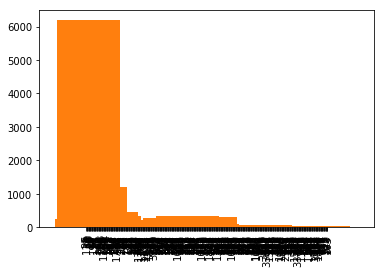

385


In [7]:
print(len(ds1['retweetCount']))
labels, values = zip(*Counter(ds1['retweetCount']).items())
indexes = np.arange(len(labels))
width =100
plt.bar(indexes,values,width)
plt.xticks(indexes,labels)
plt.xticks(rotation=90)
plt.show()
print(len(labels))

In [91]:
import pprint
letstry = Counter(ds1['screenName'])
pprint.pprint(letstry)
print(len(letstry))
# there are 13020 different users

Counter({'professorcirino': 91,
         'JoceyrR': 28,
         'annapaimm': 28,
         'no_eter': 27,
         'MarceloPEC_56': 25,
         'dionianjos': 24,
         'MegVinhas': 24,
         'AryMoraesX': 23,
         'Pireko737': 23,
         'webtraderx': 22,
         'MaryVicky2005': 22,
         'markmct1': 22,
         'JoaoGGuariento': 21,
         'RojanioMarcio': 21,
         'Nanda_Olive': 20,
         nan: 20,
         'JustBira': 19,
         'RosaACL': 19,
         'Ary_AntiPT': 19,
         'tadeu_alves': 19,
         'Joclau53': 19,
         'CamilaFrrz': 19,
         'darbio_rubem': 19,
         'JocileneCwb': 19,
         'pauloquaresma2': 18,
         'TudoPorAeF': 18,
         'ellentwiss': 18,
         'fitzca': 18,
         'moemasbc57': 18,
         'iran_vale': 18,
         'MarietaPeixoto1': 18,
         'cadulorena': 17,
         'sprang_bill': 17,
         'eduardoramosde5': 17,
         'skullmann': 16,
         'mxyzptlk44': 16,
         'mary_joy_mora

         'malupedroso': 4,
         'llbene': 4,
         '_digopereira': 4,
         'marimoraez': 4,
         'jubagulho': 4,
         'evpcosta_73': 4,
         'luc4156': 4,
         'josetomazfilho': 4,
         'Rlima_consult': 4,
         'nicaciamartin': 4,
         'acncerqueira': 4,
         'Umateus': 4,
         'bbtheodore': 4,
         'DefesaHetero': 4,
         'welingtonfortes': 4,
         'Claudinhojapa': 4,
         'Luisfilosofo13': 4,
         'ismaeltrigueiro': 4,
         '165b319c7b91483': 4,
         'Cynthia_Igreja': 4,
         'luanademarchi': 4,
         'willycesar': 4,
         'arrowp': 4,
         'vinn200': 4,
         'FlorBel14850556': 4,
         'edi_lson': 4,
         'EuTerraqueo': 4,
         'cardoso_mour': 4,
         'corisconews': 4,
         'mtverolesi': 4,
         'DRonan6': 4,
         'felipe_autran': 4,
         'bittersteel01': 4,
         'Lutiburcio': 4,
         'binhoj_80': 4,
         'filla_paulo': 4,
         'marta_cardim': 

         'larambilletty': 2,
         'ronaldoberlini1': 2,
         'izurigenk': 2,
         'AnneRoCi': 2,
         'cfvascon': 2,
         'rafuiell6': 2,
         'betalab312': 2,
         'calsekotto': 2,
         'Taniamandarino': 2,
         'MarcioAventura': 2,
         'jornaltricolor': 2,
         'irisreg': 2,
         'jornalistaw': 2,
         'veranimer': 2,
         'taismorais': 2,
         'LuaHorizonte': 2,
         'JulimaRoberto': 2,
         'ebcnarede': 2,
         'paulakmc': 2,
         'shirley_loos': 2,
         'ManinhoLeite': 2,
         'ftcbrandt': 2,
         'diario_estadogo': 2,
         'ccurtyjr': 2,
         'stephanyvieiram': 2,
         'Estadao': 2,
         'nairricarte': 2,
         'byadiniz35': 2,
         'daianebteatim': 2,
         'Janecorona': 2,
         'djalmasampaio3': 2,
         'jornas13': 2,
         'tafernandes': 2,
         'rbriquet': 2,
         'Larissavgg': 2,
         'Dhiogosb': 2,
         'TarlemLima': 2,
         'ccas

         'ronthedon007': 1,
         'CarolineLeutwil': 1,
         'MyriamLevain': 1,
         'marciodesanto': 1,
         'kelechinaba': 1,
         'vitimasBancoop': 1,
         'ciannella': 1,
         'chuchos007': 1,
         'cxapec': 1,
         'Nkululekoleko': 1,
         'TeoEmanuyork': 1,
         'PhopsTheko_': 1,
         'pierre_1er': 1,
         'MarcelloBOSSHD': 1,
         'waithash': 1,
         'ralb1269': 1,
         'OlivNicReymond': 1,
         'DenzilTaylor': 1,
         'richjamesuk': 1,
         'KarinePassos': 1,
         'Klaifer': 1,
         'somuchbullsh': 1,
         'SureKamhunga': 1,
         'Foraptdilma': 1,
         'divulgapt': 1,
         'thadeubrandao': 1,
         'pixographi': 1,
         'david_rubio7': 1,
         'jonquiqui': 1,
         'ribek12000': 1,
         'vinochen': 1,
         'pratikdas211': 1,
         'shomishu': 1,
         'rhannsler': 1,
         'marcocimminella': 1,
         'Dilma_Siqueira': 1,
         'kangopie': 1,
  

         'Amyspn': 1,
         'noergologia1': 1,
         'ChabAntoine': 1,
         'biancatosinn': 1,
         'rafmontoya': 1,
         'SZ_TopNews': 1,
         'SZ': 1,
         'carmenthijs': 1,
         'bete_davis': 1,
         'EKIEMBE': 1,
         'victorAbessolo': 1,
         'magallanesMD': 1,
         'RoberGuigue': 1,
         'barameiuriong': 1,
         'alvaror57': 1,
         'bischros': 1,
         'MonikeyOlguin': 1,
         'elchuecopaz': 1,
         'japanvyas': 1,
         'mmcmsp': 1,
         'newsa1421': 1,
         'lec0001': 1,
         'OrpheuP': 1,
         'ChrisBrey1': 1,
         'histgeoblog': 1,
         'SZ_Politik': 1,
         'SolsDiego': 1,
         'Kranten_en_RTV': 1,
         'lara_mesquita': 1,
         'BeniicioJr': 1,
         'elctrodnd21': 1,
         'telegraaf': 1,
         'blackbrushrd': 1,
         'MarcusVlniciuss': 1,
         'Haskovo_NET': 1,
         'ElCubaZombie': 1,
         'JanessyG': 1,
         'willesusanne': 1,
     

         'MartinezMarcio': 1,
         'LisaibizaB': 1,
         'm42calhoun': 1,
         'Venancio246': 1,
         'freelipedias': 1,
         'arujo_rose': 1,
         '_carolmachadoo': 1,
         'milenog': 1,
         'giselabel2': 1,
         'IstauroElyades': 1,
         'camilaraquelSG': 1,
         'talitapgaiola': 1,
         'cmoyap': 1,
         'bfrthamires': 1,
         'alinemduarte': 1,
         'dan_figueiroa': 1,
         'radicaljamp': 1,
         'maxxreading': 1,
         'danamo': 1,
         'rafablima_': 1,
         'marilocosta': 1,
         'arturod04': 1,
         'viit_miranda': 1,
         'Ariel_Trebino': 1,
         'Jooblima': 1,
         'vamomakelov': 1,
         'gaberror': 1,
         'uekarol': 1,
         'ray_dantass': 1,
         'MVRActorsStudio': 1,
         'jucapa93': 1,
         'eduardooliver': 1,
         'carllos89': 1,
         'MANICIO15': 1,
         'poutine000': 1,
         'itsharmotaria': 1,
         'Daniizinn': 1,
         'cot

         'oleomarques': 1,
         'Amandafelix017': 1,
         'razev': 1,
         'mardennymaia': 1,
         'AndersonPereira': 1,
         'P_Dizioli': 1,
         'Le_Niicolas': 1,
         'wesvieirah': 1,
         'marcoaxavila': 1,
         'daniellessadv': 1,
         'Armando_Sjr': 1,
         'inquietudine': 1,
         'adiosthatha': 1,
         'Joao_Tul': 1,
         'fabriciodepaula': 1,
         'denermachado5': 1,
         'Maarillian': 1,
         'icaroguibcvo': 1,
         'hebbisgn': 1,
         'ap_fernandes': 1,
         'Fabricio_betala': 1,
         'Ahjonatan': 1,
         'murilaska': 1,
         'RaphaelCRMelo': 1,
         'LsisOliver': 1,
         'igor_carrasco': 1,
         'anisionogueira': 1,
         'TommDavi': 1,
         'danielcoutinhoo': 1,
         'MitoSirius': 1,
         'ItalloReal': 1,
         'laraestevao': 1,
         'micorreo510': 1,
         'jesus2455': 1,
         'nrish_': 1,
         'fernandoboanato': 1,
         'dearkatyhuds

         'Akira_Sales': 1,
         'kylieshoot': 1,
         'altierisbeliza2': 1,
         'Capivarairon': 1,
         'ROS1ER': 1,
         'kikeagusty': 1,
         'joaopedro_rb': 1,
         'Acerinox71': 1,
         'xandinhamc': 1,
         'MarluciaFeres': 1,
         'Laris_cunha': 1,
         'PanueloMaragato': 1,
         'Desabafand82': 1,
         'SpinosoAngelo': 1,
         'bruno_rissi': 1,
         'joaosilval1': 1,
         'manucaferreira': 1,
         'AraujoWallin': 1,
         'guizettermann': 1,
         'RealBrunaWalker': 1,
         'gabrelabarbosa': 1,
         'RobChukBeasley': 1,
         'JanjanReal': 1,
         'felipeterra': 1,
         'jcapreti': 1,
         'workblackjesus': 1,
         'nogitszne': 1,
         'neidesilva219': 1,
         'dellwen_': 1,
         'AcassiabA': 1,
         'FC_Pereira': 1,
         'jessicalas_': 1,
         'marceloasquino': 1,
         'kagabo1': 1,
         'golindanozuleim': 1,
         'Ferragutel': 1,
         'D

         '83Matheus': 1,
         'NhaniEvanir': 1,
         'jiminoob': 1,
         'qienfosqi': 1,
         'VillaMarcovilla': 1,
         'F_Abritta': 1,
         'marchitoma': 1,
         'SanBravoOk': 1,
         'Flabg': 1,
         'MartaOliveiraRJ': 1,
         'Monteirodaniel7': 1,
         'bahalren': 1,
         'Paulo_Telexfree': 1,
         'jr_parente': 1,
         'Igor_Pereirads': 1,
         'BandaAtomicDust': 1,
         'rafaelvgmello': 1,
         'naoexista': 1,
         'ceceu_m': 1,
         'Marketing2info': 1,
         'CleideJn': 1,
         'jussaraanderson': 1,
         'panyuu_': 1,
         'GevalterNeves': 1,
         'vitorptsilva': 1,
         'leandrosda': 1,
         'apedros': 1,
         'anabiapaa': 1,
         'DiegoAxel99': 1,
         'lhoousnd': 1,
         'gpoli': 1,
         'liviavpr_fjbp': 1,
         'THIAGOLURA': 1,
         'ThiagoRicelle1': 1,
         'kallheinisch': 1,
         'PaludoBeatriz': 1,
         '_FelipeRibeiiro': 1,
     

         'laurasnape': 1,
         'Jonhve12': 1,
         'RdGuaibaOficial': 1,
         'mahsantullo': 1,
         'titi_nelly': 1,
         'joaopauloff': 1,
         'jnahmias': 1,
         'jujuCRF_': 1,
         'perriefama': 1,
         'WladimirMiranda': 1,
         'AliveInHistory': 1,
         'marcoavila53': 1,
         'palomaneshelena': 1,
         'MonneratCapital': 1,
         'PrJRBatista': 1,
         'fluzelp': 1,
         'mario_campa': 1,
         'NCorrea27': 1,
         'MarcosA03277841': 1,
         'Seffair': 1,
         'igorccruz': 1,
         'AcRibeiro42': 1,
         'nicturro': 1,
         'RogerioCorreia_': 1,
         'susymartinezd': 1,
         'Corp_IDEAL': 1,
         'PeruChollywood': 1,
         'MundoNoticiaABC': 1,
         'NOTICIA_PERU': 1,
         'DiegoHerreraArg': 1,
         'buzzedbrands': 1,
         'aleguedes13': 1,
         'isabellacaus': 1,
         'EduardoCoutoRj': 1,
         'jonsenoh': 1,
         'patioli': 1,
         'anafir

         'rcmenegassi': 1,
         'whoismartinn': 1,
         'cheledaltro': 1,
         '_Harpia_': 1,
         '_muriloazevedo': 1,
         'popgremista': 1,
         '_angelll': 1,
         'brenervoso': 1,
         'credotheus': 1,
         'fassisdelima': 1,
         'justiniggaa': 1,
         'EmconAmbiental': 1,
         'Renatomsom': 1,
         'eduardofachetti': 1,
         'Rafiissouza': 1,
         'marjhoriefurlan': 1,
         'PEPEUNETO': 1,
         'dias_alle': 1,
         'GamerMasterD1': 1,
         'tric0s': 1,
         'oi_estranha': 1,
         'Andraus_adv': 1,
         'cristianocanuto': 1,
         'Wendell_jor': 1,
         'inter1414': 1,
         'fmmenezes': 1,
         'Elmogeneo26': 1,
         'arthursugano': 1,
         'MCDELDUQUE': 1,
         'neycar7': 1,
         'r_marangoni': 1,
         'galfolia': 1,
         'Figueirenses': 1,
         'vitoriainghes_': 1,
         'Siao_Mussini': 1,
         'DuploGG': 1,
         'Djdiegocarvalho': 1,
   

         'Alvislande': 1,
         'Valdo_G_Soares': 1,
         'wendellsneves': 1,
         'felipecmed': 1,
         'RaulCoxinha': 1,
         'arthurcavini': 1,
         'ThatianeLira': 1,
         'felipemvalente': 1,
         'cleoger': 1,
         'Doizera': 1,
         'Ramirez25Silvia': 1,
         'igili': 1,
         'Toni_C_': 1,
         'mrosariop': 1,
         'R64785664Carlos': 1,
         'williamdalmeid1': 1,
         'EsquerdaNunca': 1,
         'france_cardoso': 1,
         'TheBigSmoke23': 1,
         'Ana_Lars0n': 1,
         'ldsbh': 1,
         'MlPompeo': 1,
         'virginiafcg': 1,
         'FalsoGordo': 1,
         'sumosantoro': 1,
         'DFernandes49': 1,
         'BavarescoJr': 1,
         'Arslima': 1,
         'Martin_Mateus': 1,
         'ppireshotmail': 1,
         'mendlowicz': 1,
         'Pegasus320': 1,
         'vivirsinCFK_ya': 1,
         'thiagobmoraes': 1,
         'masbrito': 1,
         'anassilvia73': 1,
         'MariaCarmemRibe': 1,

In [92]:
no_tweets_by_user = Counter(ds1['screenName'])

In [93]:
from collections import OrderedDict
dd = OrderedDict(sorted(no_tweets_by_user.items(), key=lambda x: x[1]))
from heapq import nlargest
largest = nlargest(30, no_tweets_by_user, key=no_tweets_by_user.get)
print(largest) #top 30 most active users with tweets more than 17

['professorcirino', 'JoceyrR', 'annapaimm', 'no_eter', 'MarceloPEC_56', 'dionianjos', 'MegVinhas', 'AryMoraesX', 'Pireko737', 'webtraderx', 'MaryVicky2005', 'markmct1', 'JoaoGGuariento', 'RojanioMarcio', 'Nanda_Olive', nan, 'JustBira', 'RosaACL', 'Ary_AntiPT', 'tadeu_alves', 'Joclau53', 'CamilaFrrz', 'darbio_rubem', 'JocileneCwb', 'pauloquaresma2', 'TudoPorAeF', 'ellentwiss', 'fitzca', 'moemasbc57', 'iran_vale']


[91, 28, 28, 27, 25, 24, 24, 23, 23, 22, 22, 22, 21, 21, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18]


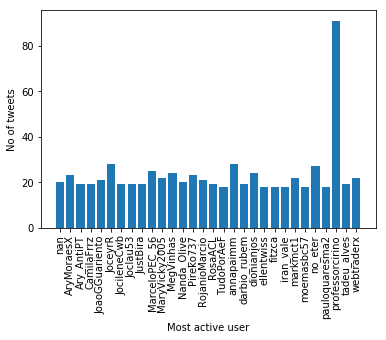

In [94]:
no_tweet = []
for i in largest:
    no_tweet.append(dd[i])
print(no_tweet)
plt.bar(largest,no_tweet)
plt.xticks(rotation=90)
plt.xlabel('Most active user')
plt.ylabel('No of tweets')
plt.show()

In [97]:
ds1['retweetCount'] = pd.to_numeric(ds1['retweetCount'])
print(ds1['retweetCount'][7])

20


In [98]:
maxTweets_sorted = ds1.sort_values(by='retweetCount',ascending=False)
print(maxTweets_sorted['retweetCount'])

12272    33827
8520     33810
17536     3959
18694     3959
18074     3959
17127     3959
18398     3959
8233      3859
3018      3205
2531      3205
3575      3205
2867      3205
2984      3205
3071      3205
4328      3205
4803      3205
4358      3205
4300      3205
1167      3205
4447      3205
3465      3205
3445      3205
4673      3205
3372      3205
2682      3205
3358      3205
2713      3205
2715      3205
3355      3205
4654      3205
         ...  
3536         0
15569        0
3537         0
3521         0
7650         0
3520         0
7658         0
3507         0
15625        0
15624        0
15623        0
3509         0
11383        0
15620        0
15619        0
11385        0
11387        0
15614        0
3519         0
7651         0
15611        0
11394        0
15609        0
15607        0
11396        0
15605        0
15604        0
3517         0
3518         0
10909        0
Name: retweetCount, Length: 20420, dtype: int64


In [101]:
pprint.pprint(Counter(ds1['text']))

Counter({'RT @berriel: como a dilma consegue mano se junta 3 pessoa falando mal de mim eu jÃ¡ choro imagina isso https://t.co/1F4WnTEmY7': 339,
         'RT @BlogdoNoblat: Golpe Ã© isso: para fugir da JustiÃ§a comum, com medo do Moro, Lula vira ministro de Dilma.': 313,
         'RT @monicabergamo: URGENTE Lula deve aceitar ser ministro de Dilma.': 286,
         'RT @estadohiramico: URGENTE: Morre em BrasÃ\xadlia Presidente Dilma Rousseff. Em breve mais informaÃ§Ãµes. https://t.co/8QQZ7wNp33': 141,
         'RT @BlogDoPim: CaÃ\xadram desculpas para nÃ£o investigar Dilma, Janot. CitaÃ§Ã£o Ã© direta. IntervenÃ§Ã£o no STJ foi neste mandato. Abra inquÃ©rito ouâ?¦': 123,
         'RT @renatothibes: A Dilma vai dar o anjo pro Lula porque o Lula que fez a Dilma virar lÃ\xadder.': 116,
         'RT @el_pais: Las protestas mÃ¡s multitudinarias de la democracia en Brasil ponen contra las cuerdas a la presidenta Dilma Rousseff https://tâ?¦': 115,
         'RT @AkanchaS: biggest ever protest in hi

         'RT @anderballogh87: agora na @GloboNews: Dilma no 1Âº Mandato tirou 3 ministros do cargo por causa de investigaÃ§Ãµes, no 2Âº mandato vai colocâ?¦': 4,
         'RT @caioblinder: Sobre o tuÃ\xadte anterior, obviamente Dilma pode ficar um tempinho de rainha da Inglaterra atÃ© ser devidamente destronada pelâ?¦': 4,
         'RT @tereutrettel: o problema do brasil nao eh a dilma\r\r\n\r\r\no problema do brasil eh a hipocrisia do brasileiro': 4,
         'RT @S_Schwartzmann: Lula Da Silva aceptÃ³ entrar al gabinete de Dilma Rousseff y tendrÃ\xada jurisdicciÃ³n privilegiada, lo que dificulta su deteâ?¦': 4,
         'RT @EGMorenoR: No es contra Dilma, no es contra Lula, es contra el progreso del p...  Por: @ilkaolivacorado https://t.co/hKWJxPhA9m https:/â?¦': 4,
         'RT @oobservadorbr: Segundo DelcÃ\xaddio, a mudanÃ§a na Diretoria de FURNAS que Dilma fez p/ tirar corruptos foi o inÃ\xadcio do enfrentamento entre â?¦': 4,
         'RT @Dirlop13: #VoteiNoPTeNaoMeArrependo \r\r\

         'BrasileÃ±os claman renuncia de Dilma Rousseff https://t.co/FsvadsL5kb': 1,
         'RT @arismendijob: ConmociÃ³n polÃ\xadtica en Brasil: marchas en 438 ciudades contra Dilma Rousseff #VemPraRuaBrasil https://t.co/Pt9zxAjTyt vÃ\xada â?¦': 1,
         'â?¡ï¸? "Protestos contra Dilma superam \'Diretas JÃ¡\'"\r\r\n\r\r\nhttps://t.co/hSwTngtVha': 1,
         'RT @TELEMUNDO52: BrasileÃ±os protestan contra presidenta Rousseff https://t.co/ll6ykI2IBv https://t.co/UIqfuRhhBl': 1,
         'BrasileÃ±os protestan contra presidenta Rousseff https://t.co/FM7GIG1aiV https://t.co/6pDDIOLZOS': 1,
         'Fora Dilma fora lula https://t.co/lmpEqc2oxZ': 1,
         'BrasileÃ±os protestan contra presidenta Rousseff https://t.co/nDh91cJ8zn https://t.co/Kc18T5AfE6': 1,
         'Maior manifestaÃ§Ã£o da histÃ³ria do PaÃ\xads aumenta pressÃ£o por saÃ\xadda de Dilma https://t.co/dA3c73VeT2': 1,
         "Brazil protesters call for President's impeachment https://t.co/DSxgHSzEHx via @ABCNews": 1,
 

         'BrasileÃ±os piden renuncia de Dilma: â??No queremos una nueva Venezuela en Brasilâ?? (Con fotos) â?¦ https://t.co/NfEOziYYDN': 1,
         'Â¿Es inminente el juicio polÃ\xadtico contra Dilma Rousseff? https://t.co/N34BuqKtnf': 1,
         'Dilma abaixa o preÃ§o do chocolate': 1,
         'RT @RefeOk: "Cristina, Dilma, Duhalde y otros lÃ\xadderes internacionales manifestaron su apoyo a Lula"\r\r\n\r\r\nUna especie de trencito del terror.': 1,
         'William Waack "Jornal da Globo"  chama Dilma e Lula de mentirosos https://t.co/p4iLlfNX55 via @YouTube': 1,
         "RT @678elprograma: #Brasil\r\r\n@dilmabr no se resigna y desmiente las versiones: ''No voy a renunciar''\r\r\n\r\r\nEntrÃ¡: https://t.co/lqOtAeXBLO https:/â?¦": 1,
         'Dilma defende Lula e UNE - e ignora protestos contra ela https://t.co/MVXebAfoh3 via @veja': 1,
         'Brasile, manifestanti in piazza contro il governo di Dilma Rousseff (La Regione Ticino) https://t.co/UFPREjDkJi https://t.co/oNSTIMjyNT'

         '@elpais_brasil FOCO LULA E DILMA...NO MAIS Ã? PRA TIRAR O FOCO': 1,
         'vcs querendo impeachment da dilma e eu sÃ³ querendo um cartÃ£o com validade eterna pra pagar meia no cinema': 1,
         '@MateusVR 52% votaram na Dilma. Tem muito retardado no Brasil... 16% tÃ¡ dentro da margem í\xa0½í¸?': 1,
         'Num governo que nÃ£o governa, tanto faz. Eles sÃ³ servem para tentar defender a Dilma do impeachment. https://t.co/eTLYhxvQkw': 1,
         'RT @politicono: BELO HORIZONTE. ..... DILMA.....RENUNCIA....\r\r\n\r\r\n https://t.co/MBoTYJWLmh': 1,
         'povo idolatrar ana paula ate hj n me impressiona afinal o que esperar de um paÃ\xads que vota na dilma nea #forageralda #ficarenan': 1,
         'RT @LeonardodeP1: @Rivotripa @GFiuza_Oficial Outro artigo foda :   https://t.co/XQ7hbnbWew': 1,
         '@solesalva @AnitaMontanaro Cuando se lo lleven puesto a #Lula y a #Dilma, no los va a subestimar mÃ¡s. SerÃ¡ K Anita ?': 1,
         'RT @gloriamariabr: dilma podia sair

         'Mas, resta saber se Dilma vai adotar a pose "cordeirinha arrependida" ou se vai ser a Dama de Ferro. Se adotar a segunda, vai se dar mal.': 1,
         '@GloboNews @MichelTemer DILMA PODE MUDAR DE PARTIDO: PDT, PMDB E PSD ESTÃ?O SENDO ANALISADOS.': 1,
         'RTUOLNoticias: Planalto anuncia novo ministro da JustiÃ§a: procurador EugÃªnio AragÃ£o https://t.co/agDVL2CmmZ': 1,
         'EUGENIO ARAGAO PUTA QUE PARIU DILMA AGORA SIM\r\r\n\r\r\nVAMO ATROPELA OS MALANDRO': 1,
         'Qro comemorar, alguÃ©m confirma?&gt;&gt;Lula Ã© o novo Ministro da Casa Civil do governo de Dilma Rousseff (PT) https://t.co/10RNFnL8el via @TarsoCV': 1,
         'Lula Ã© o novo Ministro da Casa Civil do governo de Dilma Rousseff (PT) https://t.co/FlomijJC8R via @TarsoCV': 1,
         'RT @TomasBastante: InflaciÃ³n mensual Brasil  1,27% y quieren botar a Dilma, acÃ¡ sobrepasa 300 % anual y no hay luz en el tÃºnel ! https://t.â?¦': 1,
         'A voz da periferia insatisfeita que (ainda) nÃ£o foi pr

         '@BOLSATOTAL @julianyosovitch Si esto es correcto, el mercado encontrarÃ¡ la excusa para subir con o sin Dilma. Importante no quebrar piso.': 1,
         'serÃ¡ que Janot vai aprovar? Ele Ã© defensor-geral da Dilma í\xa0½í¸? (papo pra boi dormir)\r\r\n\r\r\nsÃ³ observando https://t.co/I5GsfCbVDA': 1,
         'OperaÃ§Ã£o Lava Jato: Procurador-geral avalia se pede que STF investigue Dilma por delaÃ§Ã£o de DelcÃ\xaddio: Procurad... https://t.co/svU8KUEdpR': 1,
         'OperaÃ§Ã£o Lava Jato: Procurador-geral avalia se pede que STF investigue Dilma por delaÃ§Ã£o de DelcÃ\xaddio: Procurad... https://t.co/OQTBvcos5c': 1,
         '...DEUS... ...DEUS... ...DEUS... ...DEUS... ...DEUS... ...DEUS... ...DEUS... DelcÃ\xaddio diz que nÃ£o hÃ¡ como isentar â?¦ https://t.co/rIOPdHGESr': 1,
         'DelcÃ\xaddio: Dilma matou focos de corrupÃ§Ã£o de Cunha e AÃ©cio https://t.co/BK8dmlNOIX': 1,
         'Cinismo de Lula e Dilma pode gerar revolta popular incontrolÃ¡vel, com destruiÃ§Ã£o do Pla

         'Dilma repudia tentativa da Veja de envolvÃª-la https://t.co/d5SWU0TqkR': 1,
         'Gostei de um vÃ\xaddeo @YouTube https://t.co/Iqhw3YSCCN CANALHAS + PT de Lula e Dilma.': 1,
         'Gostei de um vÃ\xaddeo @YouTube https://t.co/vnVunSkXb5: MilhÃµes protestam e exigem destituiÃ§Ã£o de Dilma Rousseff': 1,
         'https://t.co/a81y08sI23... https://t.co/Y5FpYxphHX': 1,
         'Agora Dilma coloca Lula como ministro, ele ganha o direito de suspender julgamento ate o final de mandato e ai? Adiantou fazer manifestaÃ§Ã£o?': 1,
         '1) O Globo diz que a PGR vai decidir se abre inquÃ©rito  contra Dilma.  https://t.co/PDAtwxgIrb': 1,
         'RT @julioclassic: DelcÃ\xaddio diz que nÃ£o hÃ¡ hipÃ³tese de isentar Dilma em Pasadena - PolÃ\xadtica - Hoje Em Dia https://t.co/Hm2Z2szTfn via @Portaâ?¦': 1,
         'O PT tenta emplacar a versÃ£o de que Lula aceita virar ministro graÃ§as a apelos de Dilma https://t.co/QOGZC15YFs https://t.co/bRCshw8h6M': 1,
         'RT @FridaSiKa

         'Mentira que vcs tao apoiando Dilma.': 1,
         '@rodolfogbw @br12ro E DELCÃ?DIO NÃ?O SE DAVA COM MERCADANTE! QUER COISA MAIS EVEDENTE QUE MERCADANTE ESTAVA FALANDO A MANDO DE DILMA?': 1,
         'Ã? bala no PezÃ£o e na Dilma sapatÃ£oí\xa0¼í¾§': 1,
         '.\r\r\nNÃ£o vamos nos distrair com coisas do Delcidio.\r\r\n\r\r\nDia 18 Mar apoio total a Dilma e Lula nas ruas\r\r\n\r\r\nÃ? guerra mesmo.\r\r\n.\r\r\n https://t.co/ryGwEUne9T': 1,
         '@Benja97 O pior Ã© a Dilma.. o Mercadante Ã© funcionario dela... Se Vc faz uma coisa errada num cargo de confianÃ§a.. o chefe tb Ã© culpado!': 1,
         'GREVE GERAL se Lula no MinistÃ©rio! Espalhe rÃ¡pido, Lula estÃ¡ reunido com Dilma agora.': 1,
         'odeio o governo dilma, mas odeio mais ainda q n seja uma verdadeira mudanÃ§a, e sim um golpe': 1,
         'Dilma realmente estÃ¡ em sintonia com as ruas. O povo grita "Fora Lula" e ela o nomeia Ministro. Acho que eles vÃ£o morrer abraÃ§ados.': 1,
         'Sobre a minha rel

         'Agora Ã© oficial: Lula serÃ¡ Ministro do Governo Dilma.\r\r\nEm 6 anos de (des)governo e agora a presidanta pretende... https://t.co/hSZF50drfP': 1,
         'cara tenta se pasar pela dilma msm em kkkk &lt;2\r\r\n https://t.co/EmMThQDGbu': 1,
         'GraÃ§as Ã\xa0 corja do PT e Ã\xa0 Vossa ExcelÃªncia #PresidAnta Dilma Rousseff somos motivo de piada no exterior. E o pior... https://t.co/3CiPpLpWsD': 1,
         'DelaÃ§Ã£o de DelcÃ\xaddio cita que Dilma acabou com corrupÃ§Ã£o emÂ\xa0Furnas https://t.co/1JMobFMvK5': 1,
         'Vergonhoso isso! Ainda tenho esperanÃ§a de ver Lula e Dilma presos! https://t.co/clN7bAfHbu': 1,
         'Se  o PT assassinar o assessor ou Delcidio q entregou Mercadante, Dilma e Cardozo. A culpa sera do Janot @MPF_PGR\r\r\nhttps://t.co/RtgmlqPhUS': 1,
         'Gostei de um vÃ\xaddeo @YouTube de @w_olff https://t.co/S8zunUnigw Minecraft Machinima 7 Coisas que a DILMA faria no minecraft': 1,
         'Homologada delaÃ§Ã£o de DelcÃ\xaddio. Acabou par